# Using MolMIM Embeddings to Cluster Molecules

```{note}
This notebook assumes that you have the MolMIM NIM available at the following address: `http://localhost:8000`. If your container is available at different address, you will need to modify the URL below.
```

Generative AI models, such as MolMIM, can be trained on molecular structures to learn a representation of molecules, often referred to as a "molecular embedding". These embeddings are high-dimensional vectors that capture the essential features and properties of molecules.

Once trained, these models can be used to generate embeddings for new, unseen molecules. These embeddings can then be clustered using various clustering algorithms, such as k-means, hierarchical clustering, or density-based clustering.

**Significance of clustering molecular embeddings:**

Clustering molecular embeddings can reveal meaningful patterns and relationships between molecules that are not immediately apparent from their chemical structures. By grouping molecules with similar properties and behaviors, clustering can:

1. **Identify molecular families**: Clustering can help identify groups of molecules with similar chemical structures, properties, and biological activities, which can be useful for understanding the relationships between molecular structure and function.
2. **Reveal functional relationships**: Clustering can uncover functional relationships between molecules, such as molecules with similar biological targets or mechanisms of action.
3. **Improve molecular property prediction**: By identifying clusters of molecules with similar properties, clustering can improve the accuracy of molecular property prediction models, such as those used for toxicity prediction or drug design.
4. **Guide lead optimization**: Clustering can help identify clusters of molecules with similar biological activities, which can guide lead optimization efforts and accelerate the discovery of new drugs.
5. **Uncover novel molecular mechanisms**: Clustering can reveal novel molecular mechanisms or biological pathways by identifying clusters of molecules with similar biological activities or properties.

In the following notebook, we provide an example using the MolMIM NIM to generate embeddings for a small set of molecules. We then use those embeddings to cluster the molecules hierarchically.

We start by importing the necessary libraries, including `requests` for making HTTP requests, `json` for working with JSON data, `pandas` for data manipulation, `numpy` for numerical computations, `seaborn` for data visualization, and `matplotlib` for plotting.

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The next block defines the URL and headers for making an HTTP request to the MolMIM NIM running at `http://localhost:8000/embedding`. The headers specify that the request body should be in JSON format and that the response should be in JSON format as well.

In [2]:
# Define the URL and headers
url = "http://localhost:8000/embedding"
headers = {
    'accept': 'application/json',
    'Content-Type': 'application/json'
}

This block defines a list of molecule sequences in SMILES format. These sequences will be used to generate embeddings, which are numerical representations of the molecules. The molecules here are a very small subset of those found in the ZINC15 database.

In [3]:
molecules = [
    "CC[C@@H](OC)[C@H](Cl)C(=O)N1CCCCC1",
    "C[C@H]([C@@H](C)O)S(=O)(=O)CC(=O)N1CCC1",
    "CCOC(=O)C1CCN(C(=O)[C@@H](N)C[C@H](C)CC)CC1",
    "CCN1CCN(C(=O)[C@H](C)N2C[C@@H](C)[S@+]([O-])[C@@H](C)C2)CC1",
    "C[C@H](CC(N)=O)C(=O)N1CCCN(C(=O)CN2CCC[C@H]2C)CC1",
    "CCC1(NCCC[C@H](C)O)CCN(C(=O)CC2(O)CCC2)CC1",
    "CCOC(=O)[C@@H]1CCCN(C(=O)CN(C)[C@@H](C)C(=O)N2CCC[C@@H](C(=O)OCC)C2)C1",
    "NC(=O)C[C@@H](N)C(=O)N1CCN(C(=O)CN2CCCC2)CC1",
    "COC(=O)C[C@H](N)C(=O)N1CC[C@H](C(=O)OC)[C@H](C)C1",
    "C[C@H](NC[C@@H]1[C@@H]2CCC[C@@H]21)C(=O)N1CCCCC1",
    "CCN(CC(F)(F)F)C(=O)[C@@H]1CCCN(C(=O)[C@H](C)C(C)C)C1",
    "CO[C@@H](C)C(=O)N1CCC(C)(C(N)=S)CC1",
    "CN(C)C[C@@H](N)COCCC(=O)N1CCCCC1",
    "CON(CC1CC1)C(=O)N1CC[C@@H](C(N)=S)C1",
    "CC(C)N1CCN(C2CN(C(=O)[C@@]3(N)C[C@@H]3C)C2)CC1",
    "CCNC(=O)CC(=O)O[C@@H](C)C(=O)N1CCC[C@H](C(=O)OCC)C1",
    "CCN(CCC(N)=S)[C@@H](C)C(=O)N1CCCCCC1",
    "CC(C)[C@@H](O)CN1CC[C@H](C(=O)N(C)C)C1",
    "CC(C)C[C@@H](N)CC(=O)N1CCOC[C@@H](CO)C1",
    "C[C@H](N)[C@@H](C)C(=O)CC1CCCC1",
    "CCCC[C@H](C)N(CCCC)C(=O)[C@H]1CCCN(C(=O)[C@@H](C)CC)C1",
    "C=C(C)CCNC[C@@H](C)N(C)C(=O)[C@@H]1CCCN(C(C)=O)C1",
    "CCC(CC)CC(=O)O[C@@H](C(=O)N1CCC[C@@H](C(N)=O)C1)C(C)C",
    "C[C@@H](C(=O)N1CCN(C(=O)C(=O)N2CCCC2)CC1)C(F)(F)F",
    "CCC(CC)[S@@+]([O-])[C@@H](C)C(=O)N1CCC(C)CC1"
]

This block converts the list of molecule sequences to a JSON string, makes a POST request to the server with the JSON data, parses the response as JSON, extracts the embeddings from the response, and converts the embeddings to a Pandas DataFrame.

In [4]:
# Convert the sequences to a JSON string
data = json.dumps({"sequences": molecules})

# Make the API call to get the embeddings
response = requests.post(url, headers=headers, data=data)

# Parse the response as JSON
embeddings = json.loads(response.text)["embeddings"]

# Convert the embeddings to a Pandas DataFrame
df = pd.DataFrame(embeddings)

This final block plots a hierarchically clustered heatmap using seaborn. The heatmap shows the similarity between the molecule embeddings, with similar molecules clustered together. The x-axis shows the embedding dimension and the y axis shows the index of the molecule in the original list.

<Figure size 800x800 with 0 Axes>

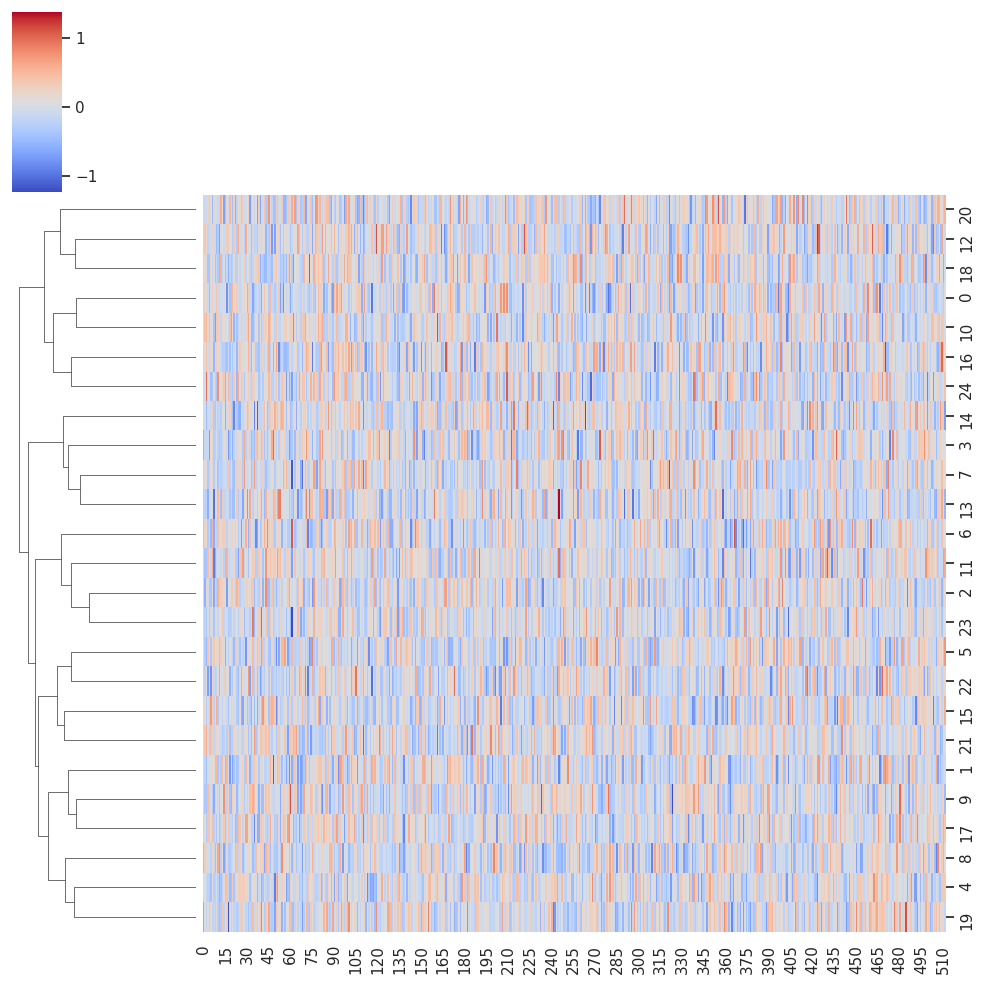

In [5]:
# Plot the hierarchically clustered heatmap using seaborn
sns.set()
plt.figure(figsize=(8, 8))
sns.clustermap(df, method="ward", cmap="coolwarm", col_cluster=False)
plt.show()